In [1]:
import pandas as pd
import numpy as np
import sqlite3
import json
import matplotlib.pyplot as plt

In [2]:
EXTRACTED_FEATURES_DB_NAME = '/data/experiments/YHE-R/extracted-features/extracted-features.sqlite'

In [3]:
db_conn = sqlite3.connect(EXTRACTED_FEATURES_DB_NAME)
sequences_df = pd.read_sql_query("select sequence,charge,run_name,human,classed_as from features", db_conn)
db_conn.close()

In [4]:
sequences_df.classed_as.unique()

array(['decoy', 'target'], dtype=object)

In [5]:
sequences_df['group'] = sequences_df.run_name.apply(lambda x: x.split('_')[0])

In [6]:
sequences_df.columns

Index(['sequence', 'charge', 'run_name', 'human', 'classed_as', 'group'], dtype='object')

In [7]:
sequences_df[['sequence','charge','run_name','human','group','classed_as']].sample(n=5)

,sequence,charge,run_name,human,group,classed_as
653519,GTEGHQGPLTCVAANQDGSLILTGSVDCQAK,3,YHE010_02_Slot1-1_1_2987,1,YHE010,target
778156,M[15.9949]TTDQHQEILR,2,YHE211_05_Slot1-1_1_3001,0,YHE211,target
643072,YSLVSEQLEPAATSTYR,2,YHE010_06_Slot1-1_1_2991,1,YHE010,target
607843,SRAEAESMYQIK,2,YHE010_05_Slot1-1_1_2990,1,YHE010,decoy
741890,HENESGFDEGQIIR,2,YHE114_09_Slot1-1_1_3016,0,YHE114,target


#### analyse the YHE runs

In [9]:
yhe_only_df = sequences_df[(sequences_df.group == 'YHE114') | (sequences_df.group == 'YHE211')]
yhe_only_targets_df = yhe_only_df[(yhe_only_df.classed_as == 'target')]

In [10]:
number_of_yhe_runs_in_experiment = len(yhe_only_df.run_name.unique())
print('there are {} YHE runs in the experiment'.format(number_of_yhe_runs_in_experiment))

there are 21 YHE runs in the experiment


In [11]:
# count how many runs each sequence/charge was extracted from and classified as a target
sequence_occurences_l = []
for group_name,group_df in yhe_only_targets_df.groupby(['sequence','charge'], as_index=False):
    sequence_occurences_l.append((group_name, len(group_df.run_name.unique()), group_name[0], group_name[1]))
yhe_sequence_occurences_df = pd.DataFrame(sequence_occurences_l, columns=['sequence_charge','number_of_runs_targets_extracted','sequence','charge'])

In [12]:
# display the number of missing values across the experiment
yhe_sequence_occurences_df['missing_files'] = number_of_yhe_runs_in_experiment - yhe_sequence_occurences_df.number_of_runs_targets_extracted
proportion_of_missing_values = yhe_sequence_occurences_df.missing_files.sum() / (len(yhe_sequence_occurences_df) * number_of_yhe_runs_in_experiment)
print("{}% of values are missing across the YHE-only runs.".format(round(proportion_of_missing_values*100)))

11.0% of values are missing across the YHE-only runs.


In [13]:
yhe_sequence_occurences_df.sample(n=10)[['sequence','charge','number_of_runs_targets_extracted','missing_files']]

,sequence,charge,number_of_runs_targets_extracted,missing_files
7054,EVEAVIPDHCIFASNTSALPISEIAAVSK,3,21,0
146,AAPRPAPVAQPPAAAPPSAVGSSAAAPR,3,10,11
12549,IPEDYPYPEEILNK,2,21,0
13423,KSPDSDVAATLK,2,17,4
20379,Q[-17.0265]GSLHVGDEILEINGTNVTNHSVDQLQK,3,12,9
25385,TYNTDVPLVLMNSFNTDEDTK,2,21,0
2852,CYEIASARPNDSSTM[15.9949]R,3,16,5
1818,ASDSMDSLYSGQSSSSGITSCSDGTSNR,2,21,0
5818,EGTGTEMPMIGDR,2,20,1
2232,AVPHYNR,2,21,0


In [14]:
len(yhe_only_df[yhe_only_df.classed_as == 'decoy']) / len(yhe_only_df)

0.1171149927551198

In [15]:
unique_sequences_yhe_df = yhe_only_targets_df.drop_duplicates(subset=['sequence', 'charge'], keep='first', inplace=False)
number_of_unique_sequences_yhe = len(unique_sequences_yhe_df)
number_of_unique_sequences_yhe

28981

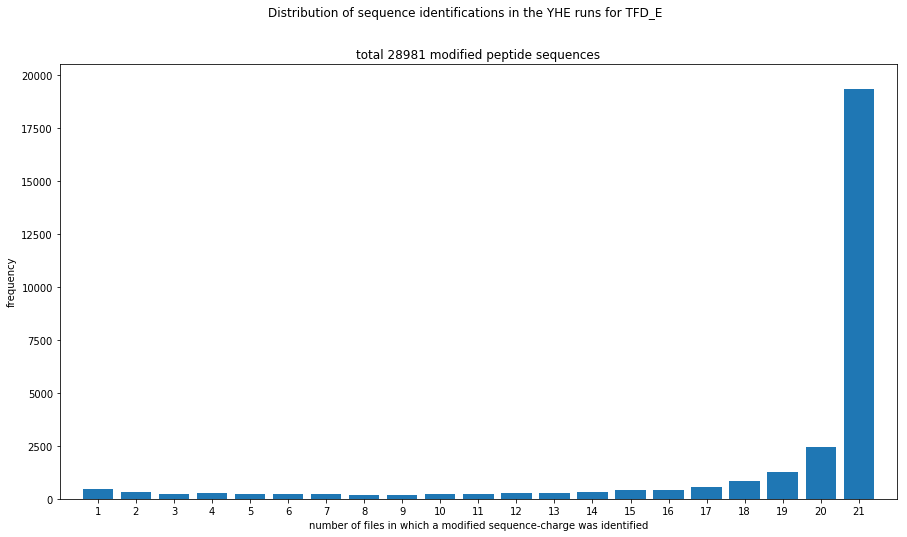

In [16]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Distribution of sequence identifications in the YHE runs for TFD_E')
plt.title('total {} modified peptide sequences'.format(number_of_unique_sequences_yhe))

counts = np.bincount(yhe_sequence_occurences_df.number_of_runs_targets_extracted)
ax1.bar(range(22), counts, width=0.8, align='center')
plt.xlabel('number of files in which a modified sequence-charge was identified')
plt.ylabel('frequency')
ax1.set(xticks=range(1,22), xlim=[0, 22])
# plt.ylim((0,20000))

plt.show()

#### now analyse the HeLa-only runs

In [17]:
human_only_df = sequences_df[(sequences_df.group == 'YHE010')]
human_only_targets_df = human_only_df[(human_only_df.classed_as == 'target')]

In [18]:
number_of_human_runs_in_experiment = len(human_only_df.run_name.unique())
print('there are {} HeLa runs in the experiment'.format(number_of_human_runs_in_experiment))

there are 10 HeLa runs in the experiment


In [19]:
# count how many runs each sequence/charge was extracted from and classified as a target
sequence_occurences_l = []
for group_name,group_df in human_only_targets_df.groupby(['sequence','charge'], as_index=False):
    sequence_occurences_l.append((group_name, len(group_df.run_name.unique()), group_name[0], group_name[1]))
human_sequence_occurences_df = pd.DataFrame(sequence_occurences_l, columns=['sequence_charge','number_of_runs_targets_extracted','sequence','charge'])

In [20]:
# display the number of missing values across the experiment
human_sequence_occurences_df['missing_files'] = number_of_human_runs_in_experiment - human_sequence_occurences_df.number_of_runs_targets_extracted
proportion_of_missing_values = human_sequence_occurences_df.missing_files.sum() / (len(human_sequence_occurences_df) * number_of_human_runs_in_experiment)
print("{}% of values are missing across the HeLa-only runs.".format(round(proportion_of_missing_values*100)))

14.0% of values are missing across the HeLa-only runs.


In [21]:
human_sequence_occurences_df.sample(n=10)[['sequence','charge','number_of_runs_targets_extracted','missing_files']]

,sequence,charge,number_of_runs_targets_extracted,missing_files
25373,VLEGLREDMLETLVPK,3,9,1
7006,FAEQYSDAAFYK,2,8,2
10128,HDHEMEDCDTEMEVDSSQLR,3,9,1
6774,EVEEISLLQPQVEESVLNLGK,2,10,0
11566,IHGTFHMQK,2,10,0
14556,LLSSAFDEVYPALPSDVQTAIK,2,10,0
13049,LAPPAAASYSQAMK,2,10,0
6969,EYVESENGQMYIQK,2,2,8
7076,FCADHPFLFFIR,3,10,0
14693,LM[15.9949]DIADMIENTTR,2,8,2


In [23]:
len(human_only_df[human_only_df.classed_as == 'decoy']) / len(human_only_df)

0.17855686494895878

In [24]:
unique_sequences_human_df = human_only_targets_df.drop_duplicates(subset=['sequence', 'charge'], keep='first', inplace=False)
number_of_unique_sequences_human = len(unique_sequences_human_df)
number_of_unique_sequences_human

27816

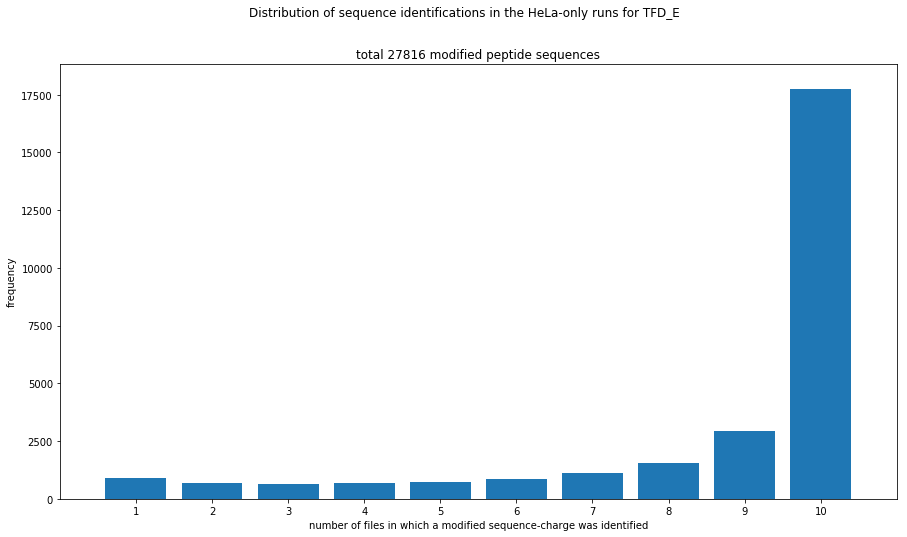

In [25]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Distribution of sequence identifications in the HeLa-only runs for TFD_E')
plt.title('total {} modified peptide sequences'.format(number_of_unique_sequences_human))

counts = np.bincount(human_sequence_occurences_df.number_of_runs_targets_extracted)
ax1.bar(range(11), counts, width=0.8, align='center')
plt.xlabel('number of files in which a modified sequence-charge was identified')
plt.ylabel('frequency')
ax1.set(xticks=range(1,11), xlim=[0, 11])
# plt.ylim((0,20000))

plt.show()